In [28]:
# Loading a dataset 
import pandas as pd

file_path = 'spotify-2023.csv'

try:
    spotify_data = pd.read_csv(file_path, encoding='latin-1')
except FileNotFoundError:
    # This handles the error or you need to provide an alternative file path 
    print("File not found.")
except UnicodeDecodeError:
    print("Unable to decode file with specified encoding.")
    
print("Data loaded successfully")

Data loaded successfully


In [34]:
# Displaying first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(spotify_data.head(10))

First 10 rows of the dataset:
                            track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2      

In [32]:
# Information about the dataset
print("Dataset Information")
spotify_data.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                 

In [36]:
# Descriptive statistics of the dataset
print("Descriptive Statistics")
print(spotify_data.describe())

Descriptive Statistics
       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%           

In [38]:
# Accessing specific columns
# For example, I want the 'track_name' and 'artist(s)_name' columns
print("Accessing specific columns ('track_name' and artist(s)_name:")
print(spotify_data[['track_name', 'artist(s)_name']].head())

Accessing specific columns ('track_name' and artist(s)_name:
                            track_name    artist(s)_name
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook
1                                 LALA       Myke Towers
2                              vampire    Olivia Rodrigo
3                         Cruel Summer      Taylor Swift
4                       WHERE SHE GOES         Bad Bunny


In [46]:
# Grouping and aggregating data
# For example, finding average danceability percentage per artist
print("Average danceability percentage per artist:")
average_danceability = spotify_data.groupby('artist(s)_name')['danceability_%'].sum()
print(average_danceability.head())

Average danceability percentage per artist:
artist(s)_name
(G)I-DLE                            155
21 Savage, Gunna                     68
24kgoldn, Iann Dior                  70
50 Cent                              90
A$AP Rocky, Metro Boomin, Roisee     60
Name: danceability_%, dtype: int64


In [50]:
# Importing NumPy library
import numpy as np

# Selecting only numerical columns for analysis
numerical_columns = ['streams', 'danceability_%', 'energy_%']
numerical_data = spotify_data[numerical_columns].copy()

# Ensure all data types are numerical 
for column in numerical_columns:
    numerical_data[column] = pd.to_numeric(numerical_data[column], errors='coerce')

# Drop rows with NaN values tha resulted from conversion errors
numerical_data = numerical_data.dropna()

# Convert to a NumPy array
numerical_array = numerical_data.to_numpy()

In [54]:
# Perform NumPy operations
# Calculate mean of 'streams' column
# Index 0 assumes 'streams' is in the first column in the array
streams_mean = np.mean(numerical_array[:, 0])
print("Average number of streams:", streams_mean)

Average number of streams: 514137424.93907565


In [56]:
# Calculate standard deviation of 'danceability_%'
# Index 1 assumes 'danceability_%' is the second column
danceability_std = np.std(numerical_array[:, 1])
print("Standard deviation of danceability:", danceability_std)

Standard deviation of danceability: 14.623595373740935


In [58]:
# Calculate the median of 'energy_%'
# Index 2 assumes 'energy_%' is in the third column
energy_median = np.median(numerical_array[:, 2])
print("Median energy percentage:", energy_median)

Median energy percentage: 66.0


In [62]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


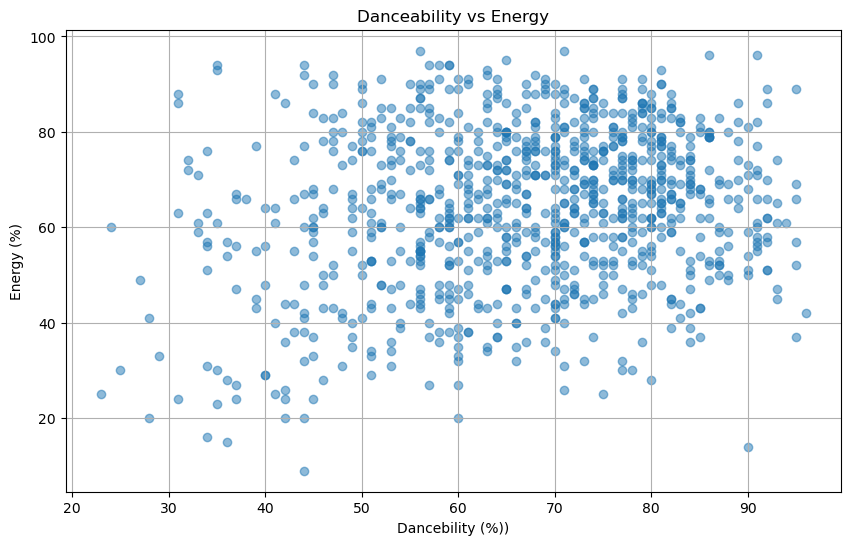

In [63]:
# Scatter Plot of Danceability vs Energy
plt.figure(figsize=(10, 6)) # Set the figure size
plt.scatter(numerical_array[:, 1], numerical_array[:, 2], alpha=0.5) # Plot danceability vs energy
plt.title('Danceability vs Energy') # Set the title of plot
plt.xlabel('Dancebility (%))') # Set the x-axis label
plt.ylabel('Energy (%)') # Set the y-axis label
plt.grid(True) # Show grid
plt.show() # Display the plot

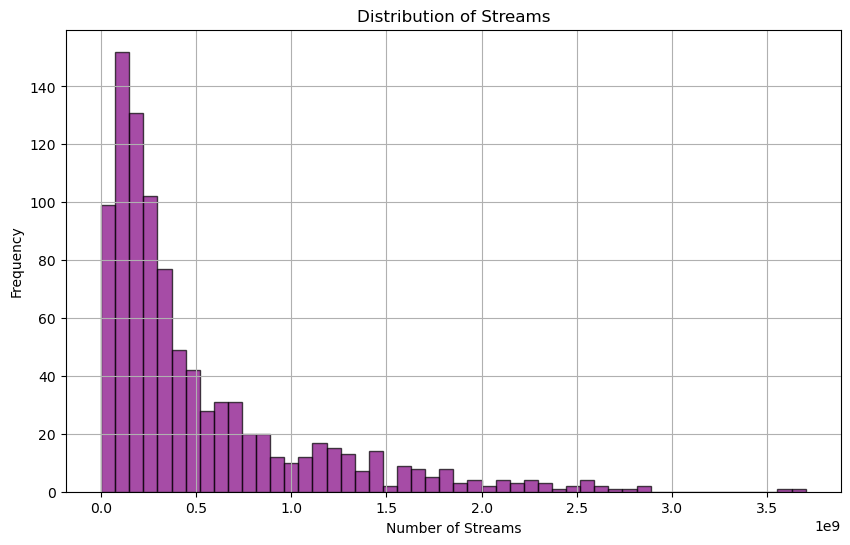

In [69]:
# Histogram of Streams
plt.figure(figsize=(10, 6)) # Set the figure size
plt.hist(numerical_array[:, 0], bins=50, color='purple', edgecolor='black', alpha=0.7) # Create a histogram of streams
plt.title('Distribution of Streams') # Set title of histogram
plt.xlabel('Number of Streams') # Set x-axis label
plt.ylabel('Frequency') # Set y-axis label 
plt.grid(True) # Show grid
plt.show() # Show histogram

In [71]:
# Import Seaborn
import seaborn as sns

In [73]:
# Set the aesthetic style of the plots 
sns.set_style('whitegrid')

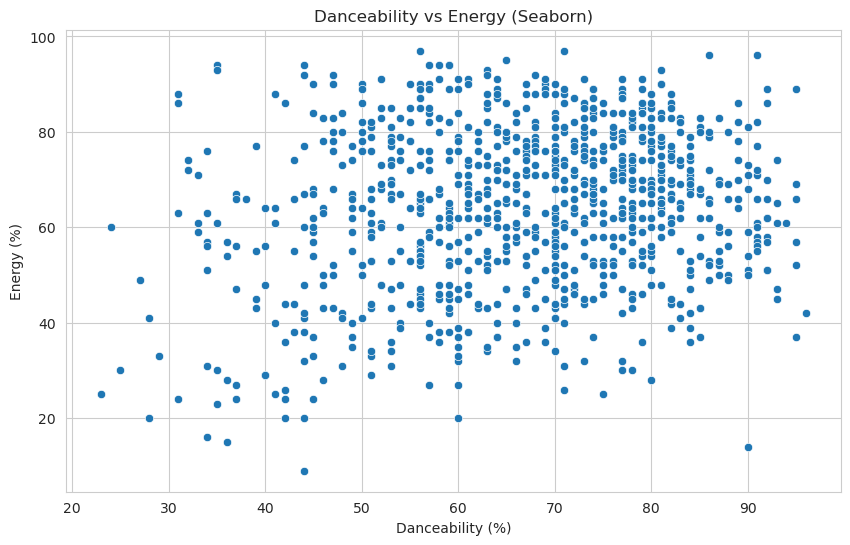

In [77]:
# Scatter Plot with Seaborn 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='energy_%', data=spotify_data)
plt.title('Danceability vs Energy (Seaborn)') # Create a title
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.show()

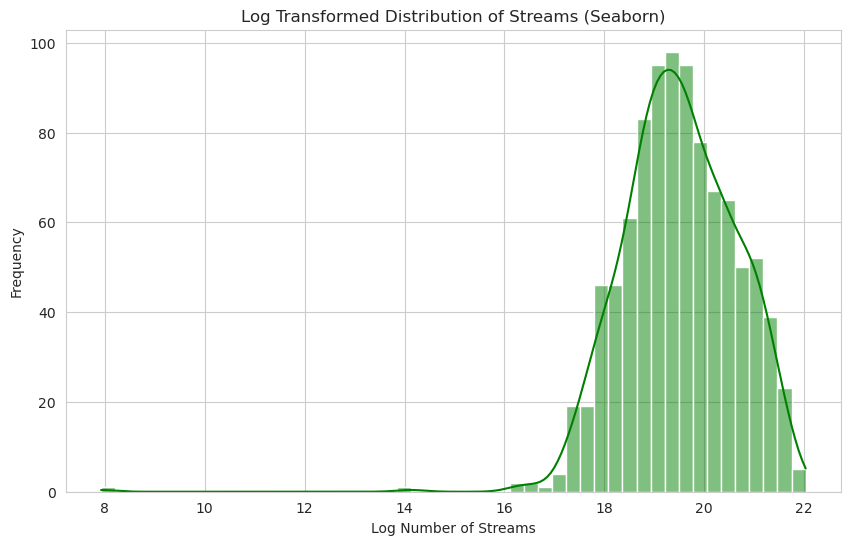

In [81]:
# Ensure that 'streams' is a numeric column
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Drop any NaN values resulting from conversion errors
spotify_data = spotify_data.dropna(subset=['streams'])

# Apply log transformation with np.log1p
# np.log1p is used for log transformation to handle zero stream counts as well
spotify_data['log_streams'] = np.log1p(spotify_data['streams'])

# Creating histogram with transformed data 
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['log_streams'], bins=50, kde=True, color='green')
plt.title('Log Transformed Distribution of Streams (Seaborn)')
plt.xlabel('Log Number of Streams')
plt.ylabel('Frequency')
plt.show()

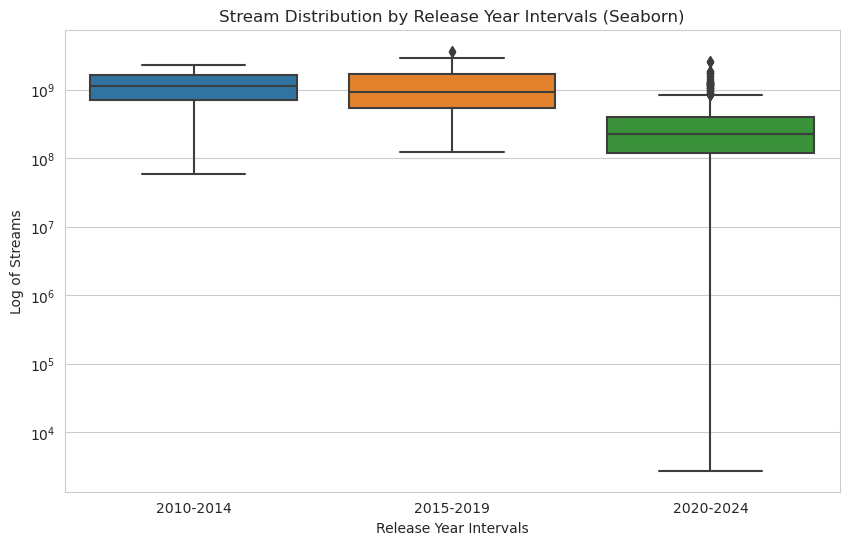

In [99]:
# Convert 'released year' to numeric and create a new column for year intervals
spotify_data['released_year'] = pd.to_numeric(spotify_data['released_year'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['released_year'])

# Define year intervals 
year_bins = [2010, 2015, 2020, 2025]
year_labels = ['2010-2014', '2015-2019', '2020-2024']
spotify_data['year_interval'] = pd.cut(spotify_data['released_year'], bins=year_bins, labels=year_labels, right=False)

# Create a box plot with year intervals 
plt.figure(figsize=(10, 6))
sns.boxplot(x='year_interval', y='streams', data=spotify_data)
plt.yscale('log') # Apply log scale due to wide range of 'streams'
plt.title('Stream Distribution by Release Year Intervals (Seaborn)')
plt.xlabel('Release Year Intervals')
plt.ylabel('Log of Streams')
plt.show()

In this project, a list of the most famous 2023 songs on Spotify was analyzed.
The number of streams was visualized by creating a histogram. Danceability and Energy were visually compared using a scatterplot and in a scatterplot in Seaborn.
Log transformed distribution of streams was graphically visaul
